In [1]:
#Downloading dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d nelgiriyewithana/world-stock-prices-daily-updating

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating
License(s): other
 59% 7.00M/11.8M [00:00<00:00, 56.6MB/s]
100% 11.8M/11.8M [00:00<00:00, 86.7MB/s]


In [2]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/world-stock-prices-daily-updating.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [4]:
df = pd.read_csv('/content/World-Stock-Prices-Dataset.csv')

In [5]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-03-17 00:00:00-04:00,7.030000,7.030000,6.450000,6.590000,14585300.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-03-17 00:00:00-04:00,10.400000,10.730000,10.330000,10.580000,4405200.0,0.0,0.0,zoominfo,ZI,technology,usa,NaN
2,2025-03-17 00:00:00-04:00,121.699997,122.629997,120.949997,122.139999,36100.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2025-03-17 00:00:00-04:00,265.190002,266.440002,261.269989,264.380005,2975800.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2025-03-17 00:00:00-04:00,25.535000,25.535000,25.410000,25.410000,1800.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305026,2000-01-03 00:00:00-05:00,19.481210,19.515179,18.903737,19.158504,3320000.0,0.0,0.0,philips,PHG,technology,netherlands,NaN
305027,2000-01-03 00:00:00-05:00,15.207880,15.207880,14.486817,14.781797,10997000.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
305028,2000-01-03 00:00:00-05:00,9.653981,9.765803,9.355788,9.467610,3277800.0,0.0,0.0,southwest airlines,LUV,aviation,usa,NaN
305029,2000-01-03 00:00:00-05:00,23.135441,23.295548,22.495014,23.075401,2870400.0,0.0,0.0,target,TGT,retail,usa,NaN


In [7]:
df.info

<bound method DataFrame.info of                              Date        Open        High         Low  \
0       2025-03-17 00:00:00-04:00    7.030000    7.030000    6.450000   
1       2025-03-17 00:00:00-04:00   10.400000   10.730000   10.330000   
2       2025-03-17 00:00:00-04:00  121.699997  122.629997  120.949997   
3       2025-03-17 00:00:00-04:00  265.190002  266.440002  261.269989   
4       2025-03-17 00:00:00-04:00   25.535000   25.535000   25.410000   
...                           ...         ...         ...         ...   
305026  2000-01-03 00:00:00-05:00   19.481210   19.515179   18.903737   
305027  2000-01-03 00:00:00-05:00   15.207880   15.207880   14.486817   
305028  2000-01-03 00:00:00-05:00    9.653981    9.765803    9.355788   
305029  2000-01-03 00:00:00-05:00   23.135441   23.295548   22.495014   
305030  2000-01-03 00:00:00-05:00    5.731675    5.793975    5.427959   

             Close      Volume  Dividends  Stock Splits  \
0         6.590000  14585300.0        0.0           0.0   
1        10.580000   4405200.0        0.0           0.0   
2       122.139999     36100.0        0.0           0.0   
3       264.380005   2975800.0        0.0           0.0   
4        25.410000      1800.0        0.0           0.0   
...            ...         ...        ...           ...   
305026   19.158504   3320000.0        0.0           0.0   
305027   14.781797  10997000.0        0.0           0.0   
305028    9.467610   3277800.0        0.0           0.0   
305029   23.075401   2870400.0        0.0           0.0   
305030    5.482471   5825700.0        0.0           0.0   

                       Brand_Name Ticker     Industry_Tag      Country  \
0                         peloton   PTON          fitness          usa   
1                        zoominfo     ZI       technology          usa   
2                          adidas  ADDYY          apparel      germany   
3                american express    AXP          finance          usa   
4                            puma  PMMAF          apparel      germany   
...                           ...    ...              ...          ...   
305026                    philips    PHG       technology  netherlands   
305027      the coca-cola company     KO  food & beverage          usa   
305028         southwest airlines    LUV         aviation          usa   
305029                     target    TGT           retail          usa   
305030  american eagle outfitters    AEO          apparel          usa   

        Capital Gains  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
305026            NaN  
305027            NaN  
305028            NaN  
305029            NaN  
305030            NaN  

[305031 rows x 13 columns]>

In [8]:
#analyzing datatypes of columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

8

In [9]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

,0
Capital Gains,305029
Open,0
High,0
Low,0
Date,0
Close,0
Volume,0
Stock Splits,0
Dividends,0
Brand_Name,0


In [10]:
df['Country'].unique()

array(['usa', 'germany', 'netherlands', 'france', 'japan', 'canada',
       'switzerland'], dtype=object)

In [11]:
df['Ticker'].unique()

array(['PTON', 'ZI', 'ADDYY', 'AXP', 'PMMAF', 'V', 'ADBE', 'SQ', 'UL',
       'CSCO', 'JPM', 'LVMUY', 'ABNB', 'MAR', 'UBSFY', 'TM', 'AMD', 'HLT',
       'MCD', 'HD', 'MA', 'JNJ', 'UBER', 'PG', 'COIN', 'FDX', 'MMM',
       'JWN', 'PHG', 'NFLX', 'KO', 'FL', 'CROX', 'LUV', 'SHOP', 'AMZN',
       'AAPL', 'NKE', 'TGT', 'GOOGL', 'SPOT', 'ZM', 'DIS', 'RBLX',
       'NTDOY', 'DAL', 'MSFT', 'COST', 'AEO', 'HSY', 'TSLA', 'PINS',
       'BAMXF', 'CMG', 'POAHY', 'LOGI', 'CL', 'CRM', 'NVDA', 'SBUX',
       'HMC'], dtype=object)

In [12]:
df['Industry_Tag'].unique()

array(['fitness', 'technology', 'apparel', 'finance',
       'financial services', 'consumer goods', 'luxury goods',
       'hospitality', 'gaming', 'automotive', 'food', 'retail',
       'healthcare', 'cryptocurrency', 'logistics', 'manufacturing',
       'entertainment', 'food & beverage', 'footwear', 'aviation',
       'e-commerce', 'music', 'social media'], dtype=object)

In [13]:
df['Country'].unique()

array(['usa', 'germany', 'netherlands', 'france', 'japan', 'canada',
       'switzerland'], dtype=object)

In [14]:
#Dropping the date column
columns_to_drop = ['Date']
df=df.drop(columns=columns_to_drop)

In [15]:
X = df.drop('Close', axis=1)
y = df['Close']

In [16]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Brand_Name'] = label_encoder.fit_transform(X['Brand_Name'])
X['Ticker'] = label_encoder.fit_transform(X['Ticker'])
X['Industry_Tag'] = label_encoder.fit_transform(X['Industry_Tag'])
X['Country'] = label_encoder.fit_transform(X['Country'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99)

# Prediction Using Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Handle NaN values in X_train
X_train = X_train.fillna(X_train.mean())  # Replace NaNs with column means

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Handle NaN values in X_test
X_test = X_test.fillna(X_test.mean())  # Replace NaNs with column means

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.3862674021903424
MSE: 1.2932364771619407
RMSE: 1.1372055562482715


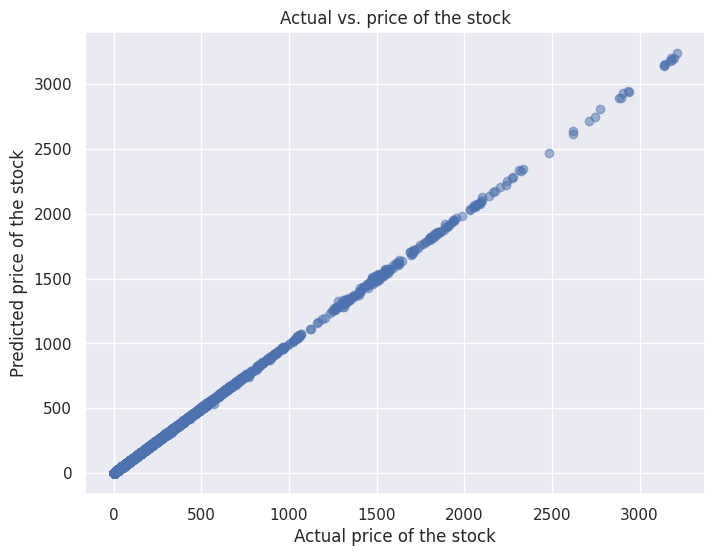

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Decision Tree Algorithm

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [25]:
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

In [26]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
y_pred = decision_tree.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 4.059928575702422
Root Mean Squared Error: 2.0149264442411843


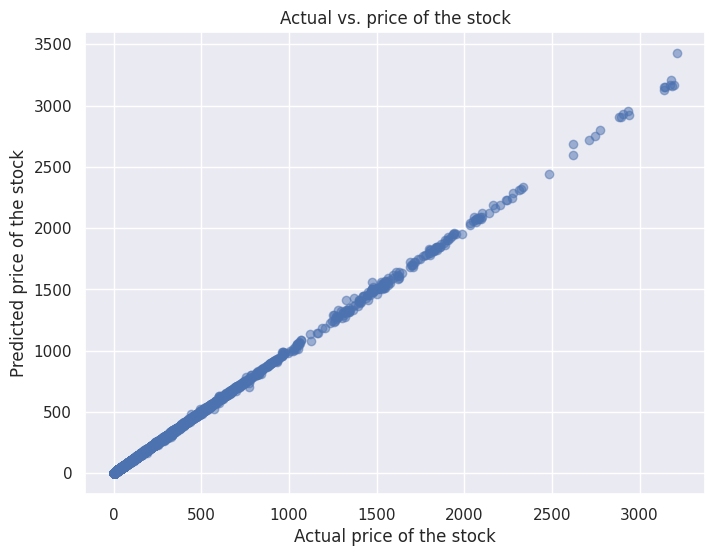

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction using k-nearest neighbors (KNN) regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [32]:
y_pred = knn.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5230.374177883983
Root Mean Squared Error: 72.32132588582695


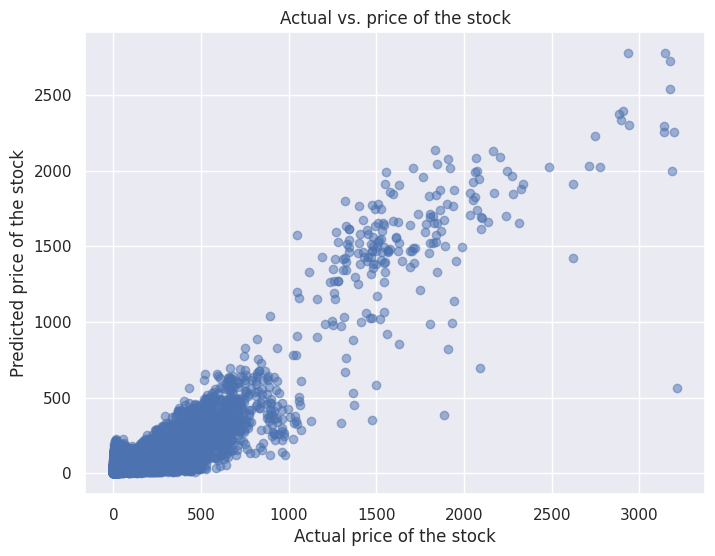

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.4119e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [37]:
y_pred = ridge_regressor.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.2932360845775472
Root Mean Squared Error: 1.1372053836390097


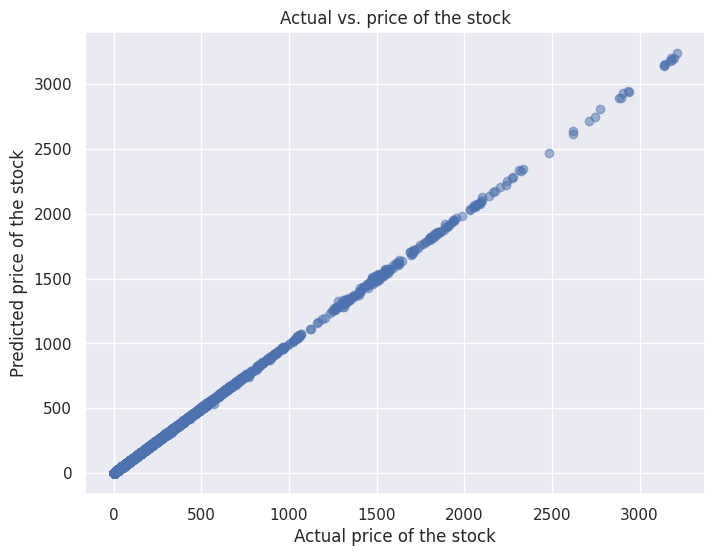

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Laso Regression

In [40]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_regressor = Lasso(alpha=1.0)
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

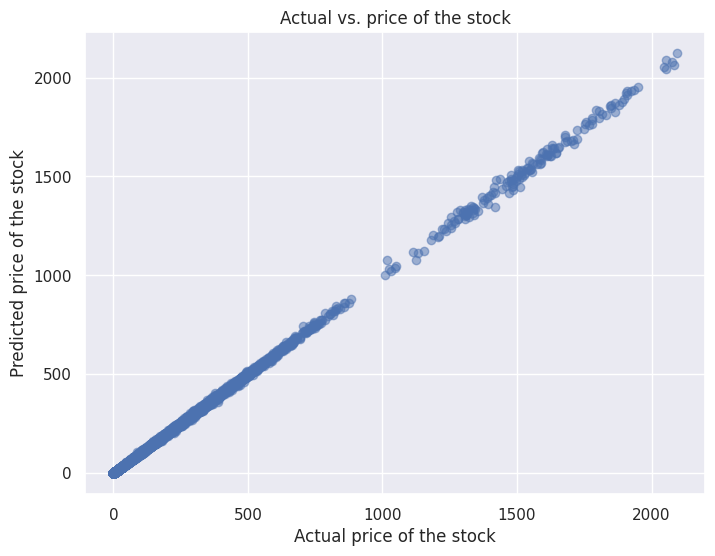

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 6372.275415893371
Root Mean Squared Error: 79.82653328244545


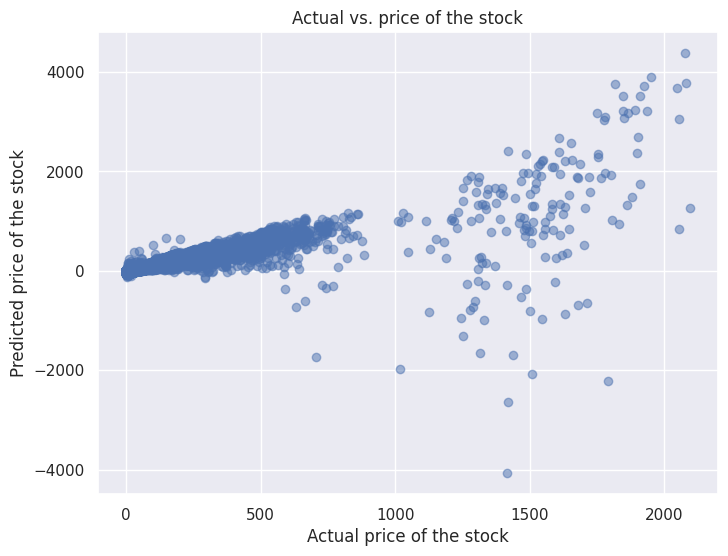

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()


# Prediction Using Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = bayesian_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.9126482080044725
Root Mean Squared Error: 0.9553262311925035


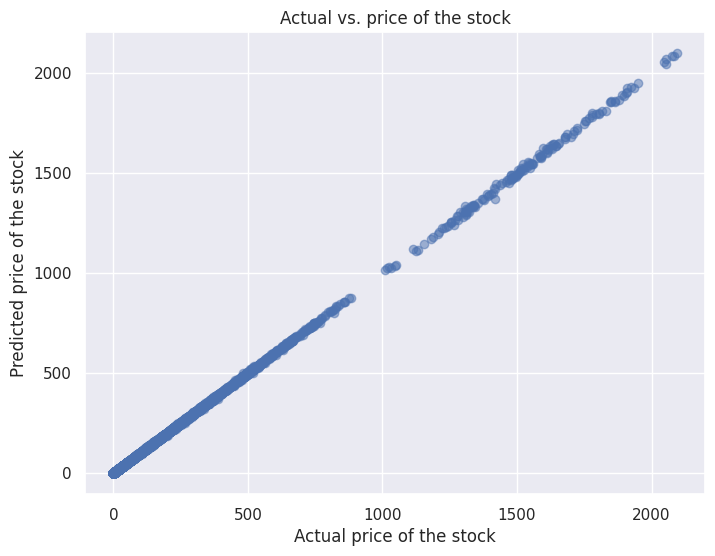

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual price of the stock')
plt.ylabel('Predicted price of the stock')
plt.title('Actual vs. price of the stock')
plt.grid(True)
plt.show()

# Prediction Using Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Calculating the daily price change as (Close - Open)
X_train['PriceChange'] = df['Close'] - df['Open']
X_test['PriceChange'] = df['Close'] - df['Open']

# Binary labels: 1 if price increased, 0 otherwise
y_train = (X_train['PriceChange'] > 0).astype(int)
y_test = (X_test['PriceChange'] > 0).astype(int)

# Droping PriceChange
X_train.drop('PriceChange', axis=1, inplace=True)
X_test.drop('PriceChange', axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 0.4965594895533592
MSE: 0.4965594895533592
RMSE: 0.7046697734069195
